In [3]:
import numpy as np
from scipy.stats import binom, nbinom, gamma, norm
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import null_space


# Part 1
## Question 1
derive markov transisionmatrix

In [4]:
p = 1/10  # Probability of departure
q = 2/5   # Probability parameter for arrivals
r = 2     # Shape parameter for arrivals

def get_p_ij(i, j):
    """
    Calculate the transition probability P(X_{t+1} = j | X_t = i).
    i: current number of patients (state X_t).
    j: next number of patients (state X_{t+1}).
    """
    prob = 0
    # Sum over all possible values of patients departing (d)
    for d in range(i + 1):  # d ranges from 0 to i
        # Probability of d departures
        prob_d = binom.pmf(d, i, p)
        # Remaining patients are i - d; arrivals bring total to j
        arrivals_needed = j - (i - d)
        prob_a = nbinom.pmf(arrivals_needed, r, q)
        prob += prob_d * prob_a
    return prob

# Construct the transition matrix P for states 0 to 10
num_states = 11
P = np.zeros((num_states, num_states))

for i in range(num_states):
    for j in range(num_states):
        P[i, j] = get_p_ij(i, j)


### Getting scipy to match

In [5]:
import math
from scipy.stats import nbinom

def negative_binomial_pmf(k, r, p):
    """Calculate the PMF of a Negative Binomial distribution."""
    q = 1 - p  # Probability of failure
    coefficient = math.comb(k + r - 1, r - 1)  # Binomial coefficient
    return coefficient * (p**r) * (q**k)

# Parameters
r = 2   # Number of successes
p = 0.4 # Probability of success
q = 1 - p  # Probability of failure

# Compare your function and scipy
for k in range(10):
    print(f"k = {k}")
    print(f"My function PMF: {negative_binomial_pmf(k, r, q)}")
    print(f"Scipy PMF:       {nbinom.pmf(k, r, q)}")
    print()


k = 0
My function PMF: 0.36
Scipy PMF:       0.36

k = 1
My function PMF: 0.288
Scipy PMF:       0.28800000000000003

k = 2
My function PMF: 0.17280000000000004
Scipy PMF:       0.17280000000000004

k = 3
My function PMF: 0.09216000000000002
Scipy PMF:       0.09215999999999998

k = 4
My function PMF: 0.04608
Scipy PMF:       0.04607999999999998

k = 5
My function PMF: 0.022118400000000007
Scipy PMF:       0.022118400000000014

k = 6
My function PMF: 0.010321920000000004
Scipy PMF:       0.010321920000000005

k = 7
My function PMF: 0.0047185920000000015
Scipy PMF:       0.004718592000000004

k = 8
My function PMF: 0.002123366400000001
Scipy PMF:       0.0021233664000000034

k = 9
My function PMF: 0.0009437184000000003
Scipy PMF:       0.0009437183999999993



[0.98040896 0.97083112 0.95681264 0.93647278 0.90727256 0.86590185
 0.80826818 0.72974943 0.62603164 0.49514272 0.34181569]


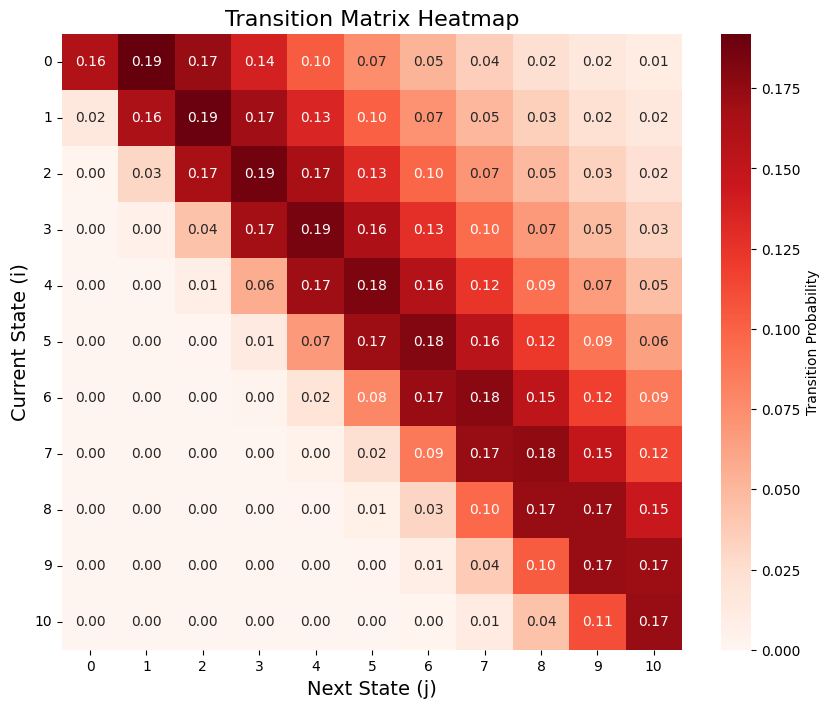

In [6]:
print(np.sum(P,axis=1))
# Create the heatmap with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(P, annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'Transition Probability'})
plt.title("Transition Matrix Heatmap", fontsize=16)
plt.xlabel("Next State (j)", fontsize=14)
plt.ylabel("Current State (i)", fontsize=14)
plt.xticks(np.arange(num_states) + 0.5, labels=range(num_states))
plt.yticks(np.arange(num_states) + 0.5, labels=range(num_states), rotation=0)
plt.show()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


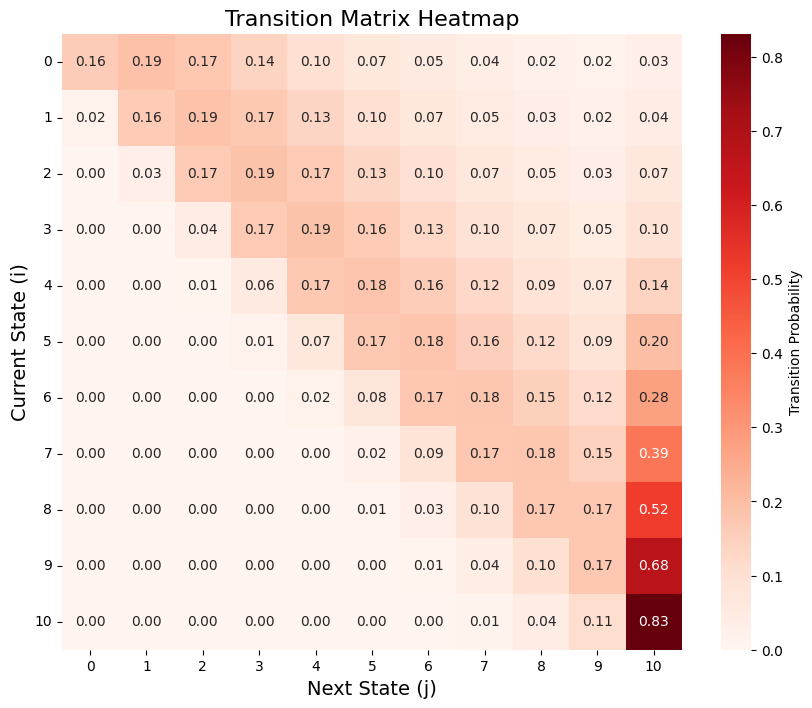

In [7]:
P[:,10] +=  1-P.sum(axis=1)
print(np.sum(P,axis=1))
# Create the heatmap with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(P, annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'Transition Probability'})
plt.title("Transition Matrix Heatmap", fontsize=16)
plt.xlabel("Next State (j)", fontsize=14)
plt.ylabel("Current State (i)", fontsize=14)
plt.xticks(np.arange(num_states) + 0.5, labels=range(num_states))
plt.yticks(np.arange(num_states) + 0.5, labels=range(num_states), rotation=0)
plt.show()

## Question 2

In [8]:
initial = np.zeros((1,11))
initial[0,0] = 1
P12 = np.linalg.matrix_power(P,12) 
states = np.array([i for i in range(11)])[:,None]
E = initial @ P12 @ states
print(E)

[[9.60503054]]


## Question 3

In [9]:
# Finding Stationary distribution
# Null space of A gives the left eigenvector
pi = null_space(P.T - np.eye(P.shape[0]))
pi = pi / np.sum(pi)
print(np.round(pi,3))
pi = pi.squeeze()

# calculating mean 
E = 0
for i in range(11):
    E += pi[i] *i
print(E)

# calculating var
V = 0
for i in range(11):
    V += pi[i] * (i-E)**2
print(V)

V = 0
for i in range(11):
    V += pi[i] * (i)**2
V -= E**2
print(V)



[[0.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [0.001]
 [0.003]
 [0.009]
 [0.027]
 [0.065]
 [0.124]
 [0.772]]
9.610707612237377
0.7234350130250847
0.7234350130250959


## Question 4

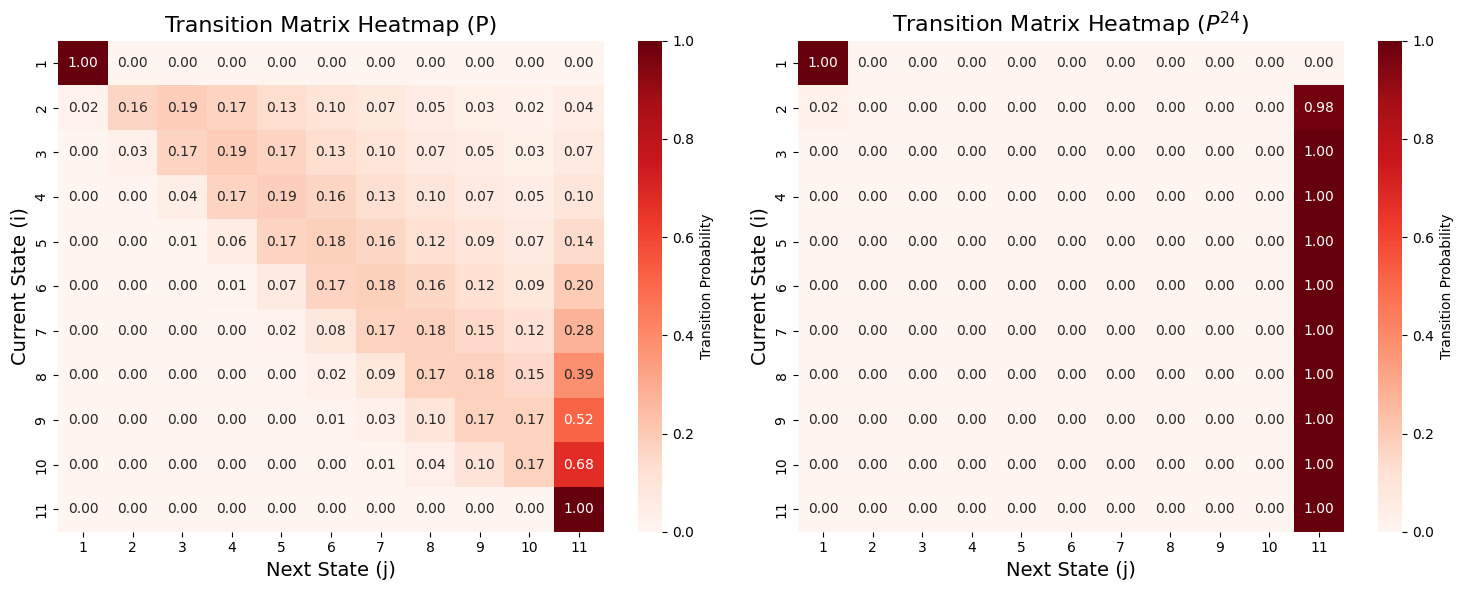

0.9999993256989292
6.743010707577213e-07


In [10]:
P[0] = 0
P[0,0] = 1
P[-1] = 0
P[-1,-1] = 1

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap for P
sns.heatmap(P, annot=True, fmt=".2f", cmap="Reds", 
            cbar_kws={'label': 'Transition Probability'}, ax=axes[0])
axes[0].set_title("Transition Matrix Heatmap (P)", fontsize=16)
axes[0].set_xlabel("Next State (j)", fontsize=14)
axes[0].set_ylabel("Current State (i)", fontsize=14)
axes[0].set_xticks(np.arange(num_states) + 0.5)
axes[0].set_yticks(np.arange(num_states) + 0.5)
axes[0].set_xticklabels(range(1, num_states + 1))
axes[0].set_yticklabels(range(1, num_states + 1))

# Heatmap for P^24
P24 = np.linalg.matrix_power(P, 24)
sns.heatmap(P24, annot=True, fmt=".2f", cmap="Reds", 
            cbar_kws={'label': 'Transition Probability'}, ax=axes[1])
axes[1].set_title("Transition Matrix Heatmap ($P^{24}$)", fontsize=16)
axes[1].set_xlabel("Next State (j)", fontsize=14)
axes[1].set_ylabel("Current State (i)", fontsize=14)
axes[1].set_xticks(np.arange(num_states) + 0.5)
axes[1].set_yticks(np.arange(num_states) + 0.5)
axes[1].set_xticklabels(range(1, num_states + 1))
axes[1].set_yticklabels(range(1, num_states + 1))

# Adjust layout
plt.tight_layout()
plt.show()

t = P24[5]
print(P24[5,10]+P24[5,0])
print(1-(P24[5,10]+P24[5,0]))

## Question 5

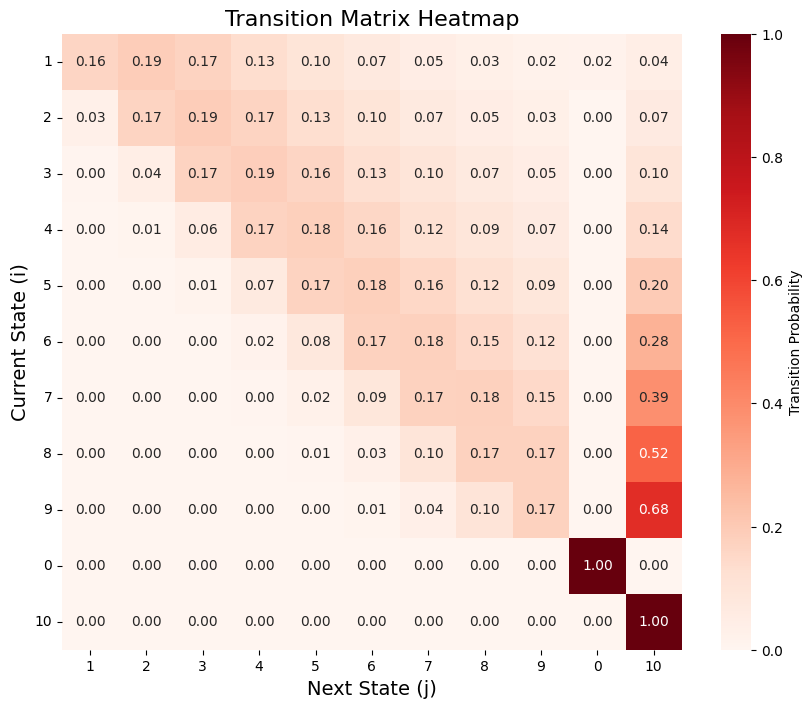

__ E(X_T=0|X0) __
prob = 0.02 if x0 = 1
prob = 0.00 if x0 = 2
prob = 0.00 if x0 = 3
prob = 0.00 if x0 = 4
prob = 0.00 if x0 = 5
prob = 0.00 if x0 = 6
prob = 0.00 if x0 = 7
prob = 0.00 if x0 = 8
prob = 0.00 if x0 = 9
__ E(X_T=10|X0) __
prob = 0.98 if x0 = 1
prob = 1.00 if x0 = 2
prob = 1.00 if x0 = 3
prob = 1.00 if x0 = 4
prob = 1.00 if x0 = 5
prob = 1.00 if x0 = 6
prob = 1.00 if x0 = 7
prob = 1.00 if x0 = 8
prob = 1.00 if x0 = 9
[8.36266485e-06]
[0.99999164]


In [11]:
# Define Transient and absorbing states
absorbing_states = [0,10]
transient_states = [i for i in range(np.shape(P)[0]) if i not in absorbing_states]
new_order = transient_states + absorbing_states

# Permute the rows and columns to get block matrix:
# [[ Q, R]
#  [ 0, I]]
P_new= P[np.ix_(new_order, new_order)] 

plt.figure(figsize=(10, 8))
sns.heatmap(P_new, annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'Transition Probability'})
plt.title("Transition Matrix Heatmap", fontsize=16)
plt.xlabel("Next State (j)", fontsize=14)
plt.ylabel("Current State (i)", fontsize=14)
plt.xticks(np.arange(num_states) + 0.5, labels=new_order)
plt.yticks(np.arange(num_states) + 0.5, labels=new_order, rotation=0)
plt.show()

k = len(absorbing_states)
b = P_new[:-k,np.array(new_order)==0] # extract probs of going into state 0 for each transient state
Q = P_new[0:-k,0:-k] # extract submatrix of all transient states

I = np.identity(Q.shape[0])
A = I-Q # identify the linear equations to determine all u_i (Au=-b)
u = np.linalg.solve(A,b) # solve system (Q-I = b)
p1 = u[5]
# print results
print('__ E(X_T=0|X0) __')
for i, prob in enumerate(u.squeeze()):
    print(f'prob = {prob:.2f} if x0 = {i+1}')
b = P_new[:-k,np.array(new_order)==10] # extract probs of going into state 0 for each transient state
u = np.linalg.solve(A,b) # solve system (Q-I = b)
p2 = u[5]
print('__ E(X_T=10|X0) __')
for i, prob in enumerate(u.squeeze()):
    print(f'prob = {prob:.2f} if x0 = {i+1}')

print(p1)
print(p2)

## Question 6

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


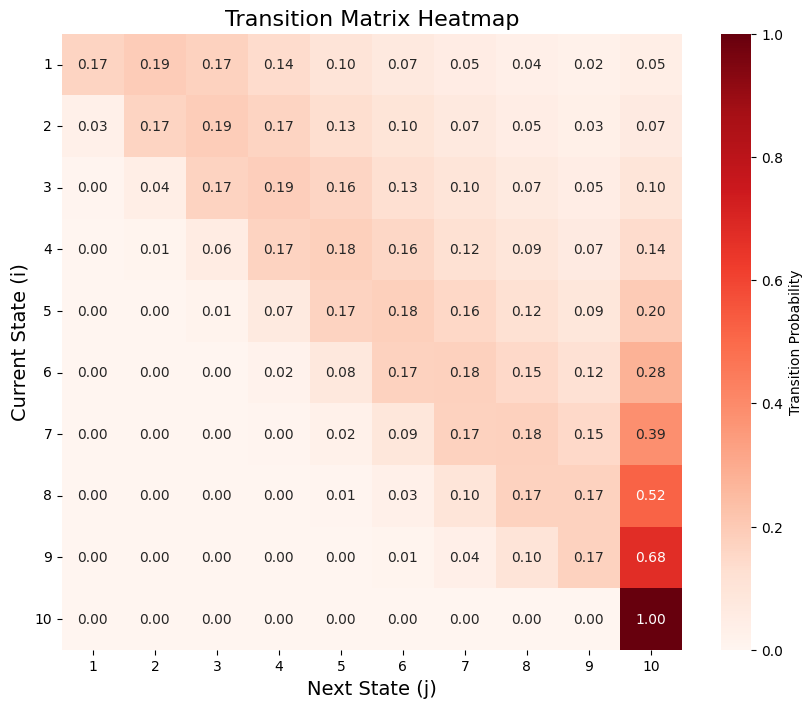

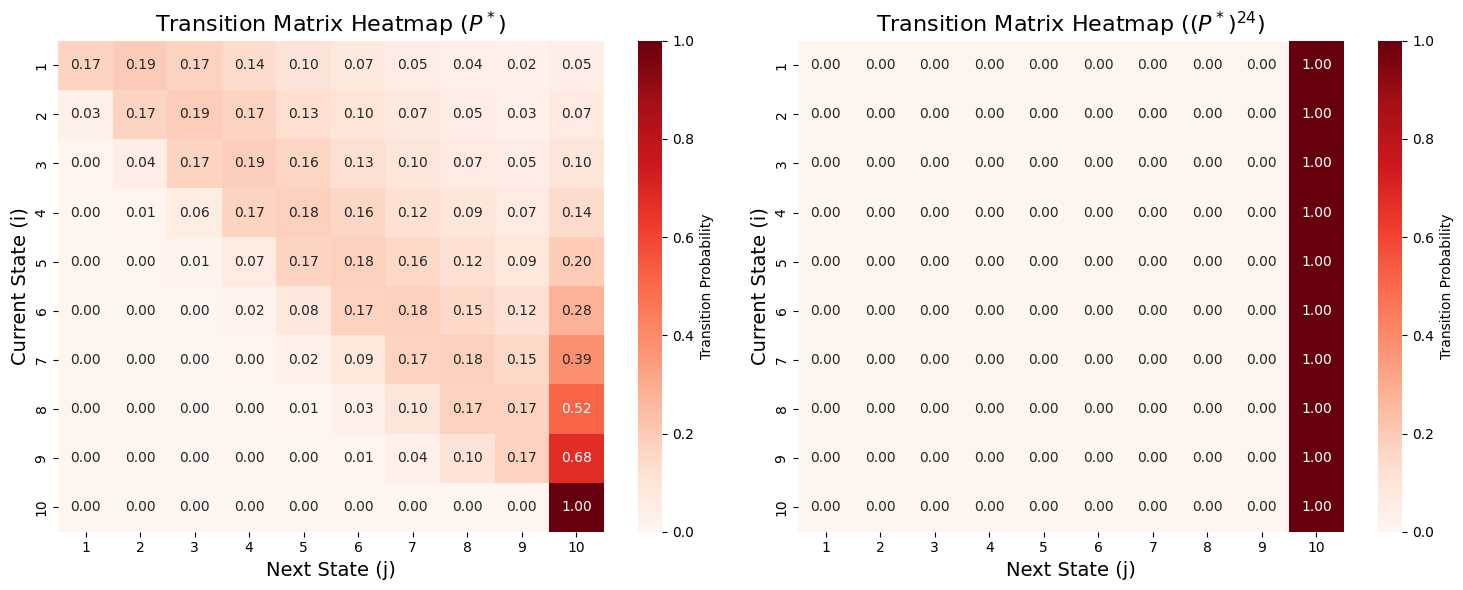

In [12]:
# Remove state 0
P_new = P[1:,1:]
# Normalize each row
P_new = P_new / P_new.sum(axis=1)[:, np.newaxis]

print(np.sum(P_new,axis=1))
# Create the heatmap with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(P_new, annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'Transition Probability'})
plt.title("Transition Matrix Heatmap", fontsize=16)
plt.xlabel("Next State (j)", fontsize=14)
plt.ylabel("Current State (i)", fontsize=14)
plt.xticks(np.arange(num_states-1) + 0.5, labels=range(1,num_states))
plt.yticks(np.arange(num_states-1) + 0.5, labels=range(1,num_states), rotation=0)
plt.show()

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap for P
sns.heatmap(P_new, annot=True, fmt=".2f", cmap="Reds", 
            cbar_kws={'label': 'Transition Probability'}, ax=axes[0])
axes[0].set_title("Transition Matrix Heatmap ($P^*$)", fontsize=16)
axes[0].set_xlabel("Next State (j)", fontsize=14)
axes[0].set_ylabel("Current State (i)", fontsize=14)
axes[0].set_xticks(np.arange(num_states-1) + 0.5)
axes[0].set_yticks(np.arange(num_states-1) + 0.5)
axes[0].set_xticklabels(range(1, num_states ))
axes[0].set_yticklabels(range(1, num_states))

# Heatmap for P^24
P24 = np.linalg.matrix_power(P_new, 24)
sns.heatmap(P24, annot=True, fmt=".2f", cmap="Reds", 
            cbar_kws={'label': 'Transition Probability'}, ax=axes[1])
axes[1].set_title("Transition Matrix Heatmap ($(P^*)^{24}$)", fontsize=16)
axes[1].set_xlabel("Next State (j)", fontsize=14)
axes[1].set_ylabel("Current State (i)", fontsize=14)
axes[1].set_xticks(np.arange(num_states-1) + 0.5)
axes[1].set_yticks(np.arange(num_states-1) + 0.5)
axes[1].set_xticklabels(range(1, num_states ))
axes[1].set_yticklabels(range(1, num_states))

# Adjust layout
plt.tight_layout()
plt.show()


In [13]:
np.linalg.matrix_power(P_new,24)[5][-1]

0.9999995397475426

# Part 2
## Question 7

Rate Matrix Q:
(8, 8)
Row sums (should be close to zero): [0.00000000e+00 0.00000000e+00 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 0.00000000e+00]


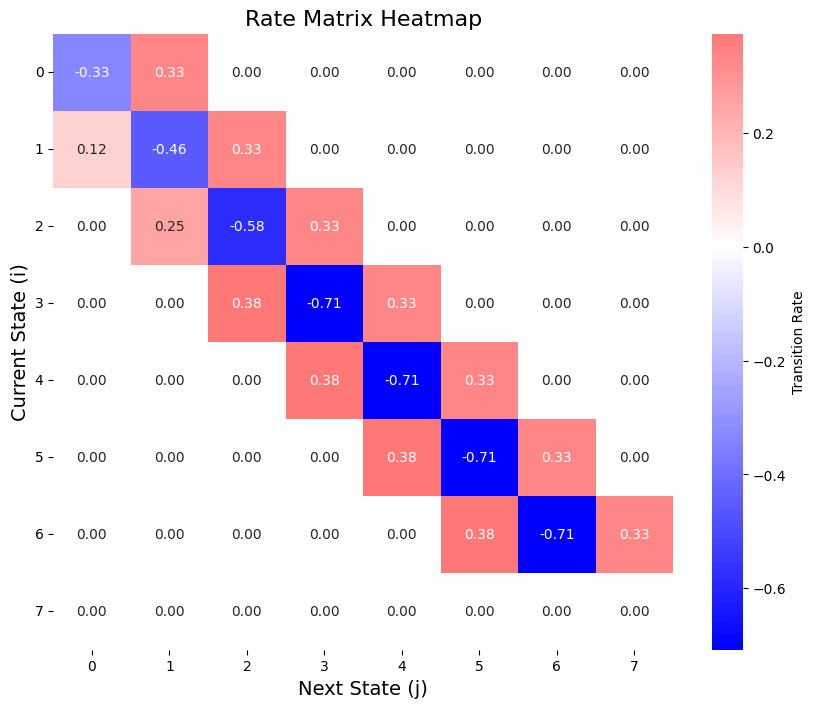

In [14]:
# Parameters
lambda_rate = 1 / 3  # Arrival rate (patients/hour)
mu_rate = 1 / 8      # Service rate (patients/hour)
max_patients = 7     # Maximum number of patients in system
max_treatment = 3    # The number of patients that can be treated at the same time

# Initialize the rate matrix Q
Q = np.zeros((max_patients + 1, max_patients + 1))

# Fill in the off-diagonal entries
for i in range(max_patients + 1):
    if i < max_patients:  # Arrivals
        Q[i, i + 1] = lambda_rate
    if i > 0:  # Departures
        Q[i, i - 1] = min(i,max_treatment) * mu_rate

# Set the diagonal entries
for i in range(max_patients + 1):
    Q[i, i] = -np.sum(Q[i, :])

# Handle the absorbing state (last row)
Q[-1] = 0

# Print the rate matrix Q
print("Rate Matrix Q:")
print(Q.shape)
print("Row sums (should be close to zero):", Q.sum(axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(Q, annot=True, fmt=".2f", cmap="bwr",center=0, cbar_kws={'label': 'Transition Rate'})
plt.title("Rate Matrix Heatmap", fontsize=16)
plt.xlabel("Next State (j)", fontsize=14)
plt.ylabel("Current State (i)", fontsize=14)
plt.xticks(np.arange(8) + 0.5, labels=range(8))
plt.yticks(np.arange(8) + 0.5, labels=range(8), rotation=0)
plt.show()


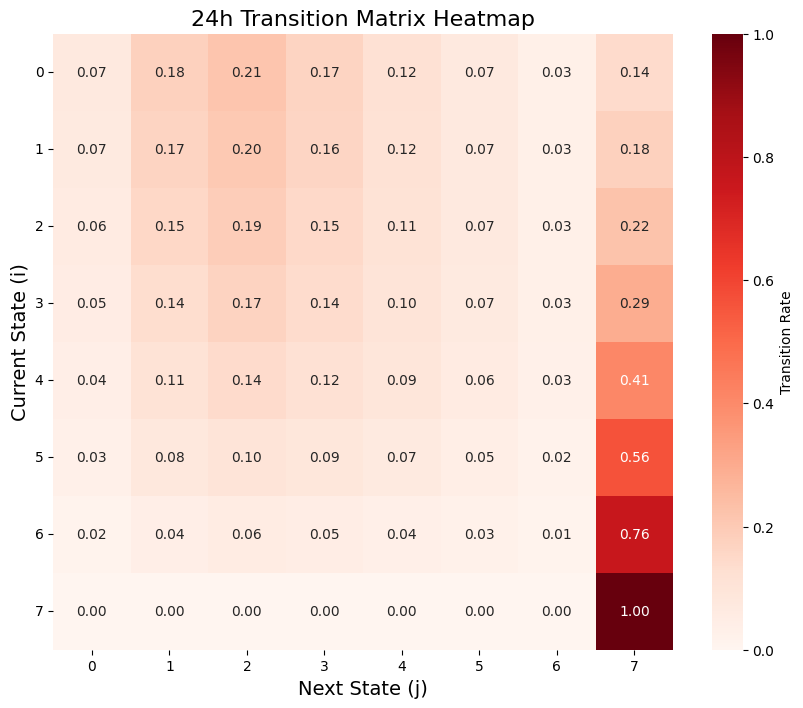

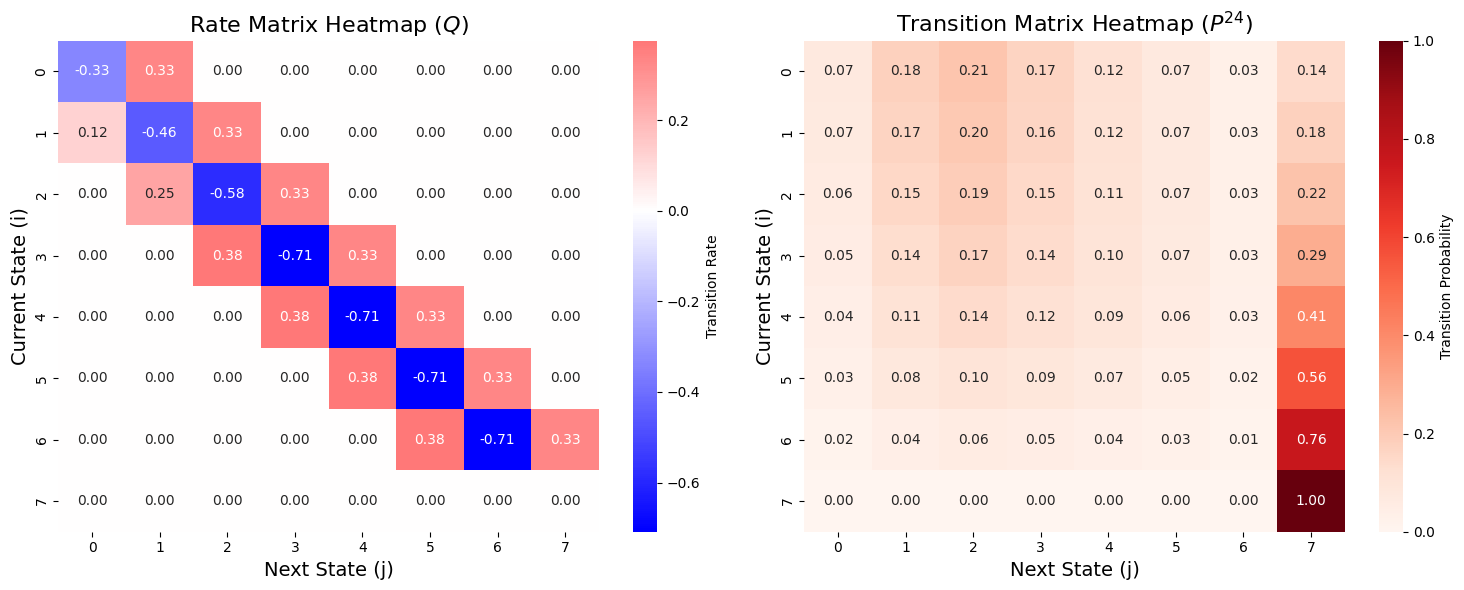

0.1416358209155472


In [15]:
from scipy.linalg import expm

P = expm(Q*24)

plt.figure(figsize=(10, 8))
sns.heatmap(P, annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'Transition Rate'})
plt.title("24h Transition Matrix Heatmap", fontsize=16)
plt.xlabel("Next State (j)", fontsize=14)
plt.ylabel("Current State (i)", fontsize=14)
plt.xticks(np.arange(8) + 0.5, labels=range(8))
plt.yticks(np.arange(8) + 0.5, labels=range(8), rotation=0)
plt.show()

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# Heatmap for P
sns.heatmap(Q, annot=True, fmt=".2f", cmap="bwr", center=0,
            cbar_kws={'label': 'Transition Rate'}, ax=axes[0])
axes[0].set_title("Rate Matrix Heatmap ($Q$)", fontsize=16)
axes[0].set_xlabel("Next State (j)", fontsize=14)
axes[0].set_ylabel("Current State (i)", fontsize=14)
axes[0].set_xticks(np.arange(8) + 0.5)
axes[0].set_yticks(np.arange(8) + 0.5)
axes[0].set_xticklabels(range(8))
axes[0].set_yticklabels(range(8))

# Heatmap for P^24
sns.heatmap(P, annot=True, fmt=".2f", cmap="Reds", 
            cbar_kws={'label': 'Transition Probability'}, ax=axes[1])
axes[1].set_title("Transition Matrix Heatmap ($P^{24}$)", fontsize=16)
axes[1].set_xlabel("Next State (j)", fontsize=14)
axes[1].set_ylabel("Current State (i)", fontsize=14)
axes[1].set_xticks(np.arange(8) + 0.5)
axes[1].set_yticks(np.arange(8) + 0.5)
axes[1].set_xticklabels(range(8))
axes[1].set_yticklabels(range(8))

# Adjust layout
plt.tight_layout()
plt.show()

print(P[0,-1])

## Question 8

In [16]:
# Parameters
lambda_rate = 1 / 3  # Arrival rate (patients/hour)
mu_rate = 1 / 8      # Service rate (patients/hour)
max_patients = 6     # Maximum number of patients in system
max_treatment = 3    # The number of patients that can be treated at the same time

# Initialize the rate matrix Q
Q = np.zeros((max_patients + 1, max_patients + 1))

# Fill in the off-diagonal entries
for i in range(max_patients + 1):
    if i < max_patients:  # Arrivals
        Q[i, i + 1] = lambda_rate
    if i > 0:  # Departures
        Q[i, i - 1] = min(i,max_treatment) * mu_rate

# Set the diagonal entries
for i in range(max_patients + 1):
    Q[i, i] = -np.sum(Q[i, :])

# Handle the absorbing state (last row)
Q[-1] = 0

S = Q[:-1,:-1]
s = Q[-1,:-1][:,None]
a = np.zeros_like(s.T)
a[0,0] = 1

E = -a @ np.linalg.solve(S,np.ones_like(s))
E = E.squeeze()
print(E)

V = 2*a @ np.linalg.solve(S,np.linalg.solve(S,np.ones_like(s))) - E**2
V = V.squeeze()
print(V)

56.00994873046888
2062.2164075710007


In [17]:
# Function to simulate time to absorption
def simulate_absorption_time(Q, initial_state, num_simulations):
    absorption_times = []
    for _ in range(num_simulations):
        state = initial_state
        total_time = 0
        while state != max_patients:  # Absorbing state is max_patients
            # Exponential time in current state
            rate = -Q[state, state]
            time_in_state = np.random.exponential(1 / rate)
            total_time += time_in_state
            
            # Transition probabilities
            transition_probs = Q[state, :] / -Q[state, state]
            transition_probs[state] = 0  # Ensure no self-transition
            
            # Select the next state
            state = np.random.choice(range(max_patients + 1), p=transition_probs)
        
        absorption_times.append(total_time)
    
    return absorption_times

# Parameters for simulation
initial_state = 0
num_simulations = 10000

# Run the simulation
absorption_times = simulate_absorption_time(Q, initial_state, num_simulations)

# Calculate statistics
mean_time = np.mean(absorption_times)
variance_time = np.var(absorption_times)

print(f"Simulated Mean Time to Absorption: {mean_time:.2f}")
print(f"Simulated Variance of Time to Absorption: {variance_time:.2f}")


Simulated Mean Time to Absorption: 55.28
Simulated Variance of Time to Absorption: 2021.76


## Question 9

In [18]:
# Parameters
lambda_rate = 1 / 3  # Arrival rate (patients/hour)
mu_rate = 1 / 8      # Service rate (patients/hour)
max_patients = 100     # Maximum number of patients in system
max_treatment = 3    # The number of patients that can be treated at the same time

# Initialize the rate matrix Q
Q = np.zeros((max_patients + 1, max_patients + 1))

# Fill in the off-diagonal entries
for i in range(max_patients + 1):
    if i < max_patients:  # Arrivals
        Q[i, i + 1] = lambda_rate
    if i > 0:  # Departures
        Q[i, i - 1] = min(i,max_treatment) * mu_rate

# Set the diagonal entries
for i in range(max_patients + 1):
    Q[i, i] = -np.sum(Q[i, :])

Expected Number of Patients: 9.05


<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
C:\Users\madsw\AppData\Local\Temp\ipykernel_10148\3928145932.py:17: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Stationary Distribution $\pi$', fontsize=16)


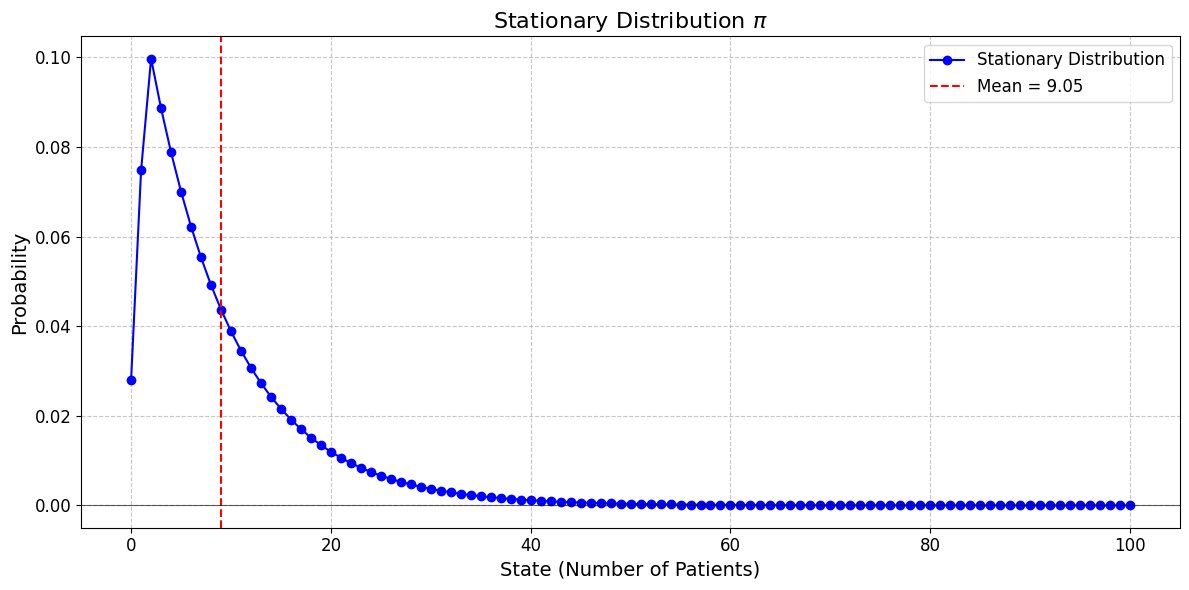

In [19]:
# Compute stationary distribution (left eigenvector with eigenvalue = 0)
pi = null_space(Q.T).flatten()  # Flatten to convert to 1D array
pi = pi / np.sum(pi)  # Normalize

# Compute the expected number of patients (mean)
E = np.sum([pi[i] * i for i in range(max_patients + 1)])
E = E.squeeze()
print(f"Expected Number of Patients: {E:.2f}")

# Plot the stationary distribution
plt.figure(figsize=(12, 6))  # Larger figure size for clarity
plt.plot(pi, marker='o', linestyle='-', color='b', label='Stationary Distribution')
plt.axvline(E, color='r', linestyle='--', linewidth=1.5, label=f'Mean = {E:.2f}')  # Add mean line
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid with a light style
plt.xlabel('State (Number of Patients)', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title('Stationary Distribution $\pi$', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, alpha=0.6)  # Horizontal line at y=0
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


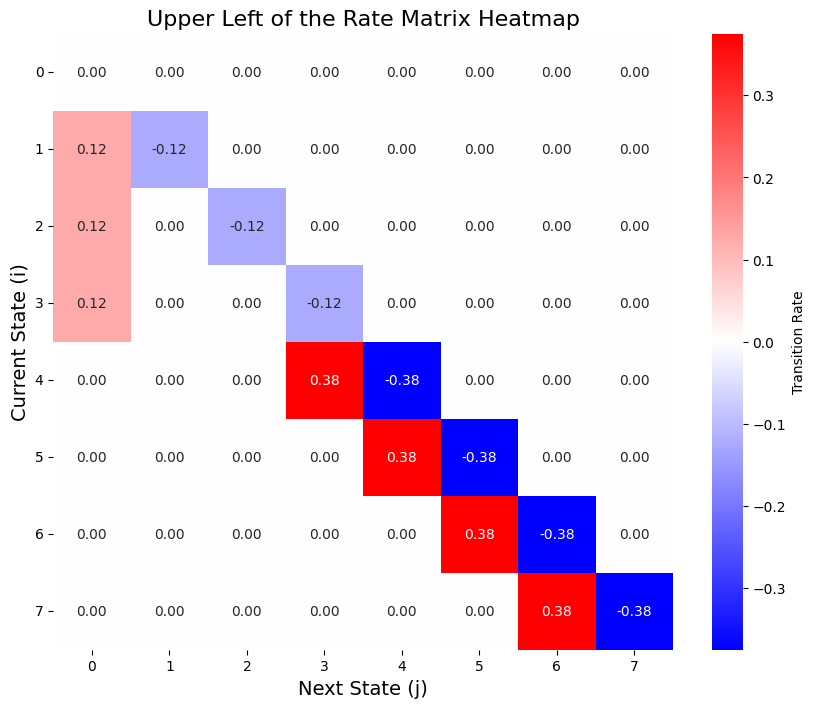

In [20]:
# Parameters
lambda_rate = 1 / 3  # Arrival rate (patients/hour)
mu_rate = 1 / 8      # Service rate (patients/hour)
max_patients = 100 +1     # Maximum number of patients in system
max_treatment = 3    # The number of patients that can be treated at the same time

# Initialize the rate matrix Q
Q = np.zeros((max_patients + 1, max_patients + 1))

# Fill in the off-diagonal entries
for i in range(max_patients + 1):
    if i > 0:  # Departures
        if i < 4:
            Q[i, 0] = mu_rate
        else:
            Q[i, i - 1] = max_treatment * mu_rate

# Set the diagonal entries
for i in range(1,max_patients + 1):
    Q[i, i] = -np.sum(Q[i, :])



# Print the rate matrix Q
plt.figure(figsize=(10, 8))
sns.heatmap(Q[:8,:8], annot=True, fmt=".2f", cmap="bwr",center=0, cbar_kws={'label': 'Transition Rate'})
plt.title("Upper Left of the Rate Matrix Heatmap", fontsize=16)
plt.xlabel("Next State (j)", fontsize=14)
plt.ylabel("Current State (i)", fontsize=14)
plt.xticks(np.arange(8) + 0.5, labels=range(8))
plt.yticks(np.arange(8) + 0.5, labels=range(8), rotation=0)
plt.show()



In [21]:
temp = 0
S = Q[1:,1:]
w_24 = expm(S*24) @ np.ones((np.shape(S)[0],1))

print(len(w_24))
print(np.shape(pi))
temp = 0
for i in range(len(pi)):
    temp += pi[i] * w_24[i]
    
print(temp)
print(pi[None,:] @ expm(S*24) @ np.ones((np.shape(S)[0],1)))

101
(101,)
[0.43030438]
[[0.43030438]]


## Question 11

In [22]:
lambd = 9/60
mu = 5 + gamma.mean(a = 4/3, scale = 30/4)/10
nu = mu
tau2 = gamma.var(a = 4/3, scale = 30/4) / 100
rho = lambd*nu
L = rho + ((lambd**2)*tau2 + rho**2) / (2*(1-rho)) # eq (9.35)
print(L)

5.034374999999995


## Question 12

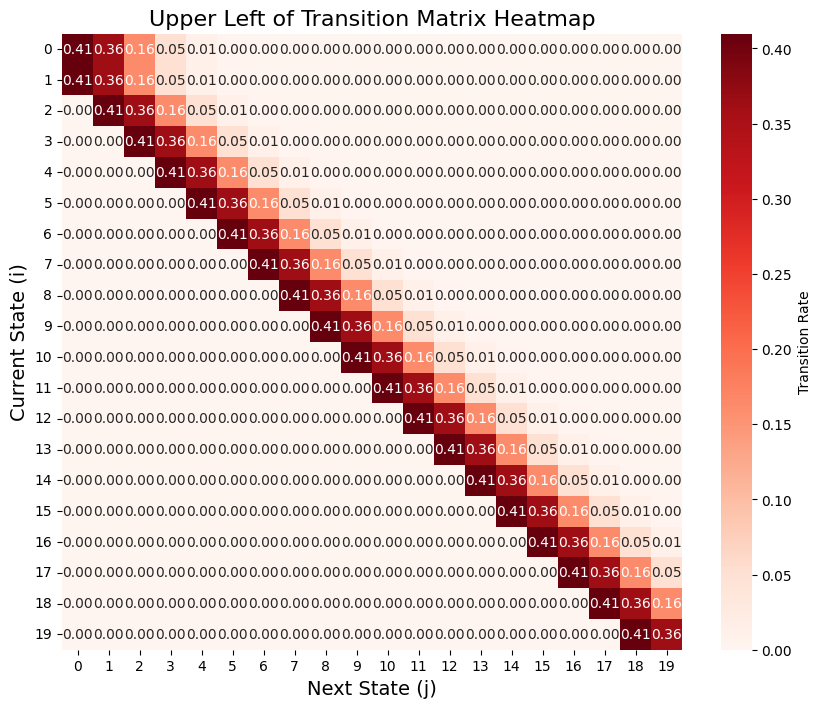

[[1.00000001e-01]
 [1.44036183e-01]
 [1.35569508e-01]
 [1.13687588e-01]
 [9.30892064e-02]
 [7.59931015e-02]
 [6.20292530e-02]
 [5.06328290e-02]
 [4.13304724e-02]
 [3.37371682e-02]
 [2.75389166e-02]
 [2.24794184e-02]
 [1.83494600e-02]
 [1.49782649e-02]
 [1.22264316e-02]
 [9.98017008e-03]
 [8.14659565e-03]
 [6.64988874e-03]
 [5.42815946e-03]
 [4.43088844e-03]
 [3.61683781e-03]
 [2.95234599e-03]
 [2.40993578e-03]
 [1.96717813e-03]
 [1.60576470e-03]
 [1.31075078e-03]
 [1.06993734e-03]
 [8.73366564e-04]
 [7.12910120e-04]
 [5.81933016e-04]
 [4.75019257e-04]
 [3.87747882e-04]
 [3.16510158e-04]
 [2.58360354e-04]
 [2.10893934e-04]
 [1.72148129e-04]
 [1.40520771e-04]
 [1.14704048e-04]
 [9.36304179e-05]
 [7.64284725e-05]
 [6.23868989e-05]
 [5.09250679e-05]
 [4.15690247e-05]
 [3.39318902e-05]
 [2.76978635e-05]
 [2.26091632e-05]
 [1.84553679e-05]
 [1.50647152e-05]
 [1.22969992e-05]
 [1.00377728e-05]
 [8.19361551e-06]
 [6.68827003e-06]
 [5.45948927e-06]
 [4.45646228e-06]
 [3.63771318e-06]
 [2.969386

In [23]:
# embeded markov chain of M/G/1
from scipy.integrate import quad
from math import factorial
from scipy.stats import poisson, gamma
# Parameters

lambd = 9/60
N = 100
# Conditional probability f(k|t)
def f_k_given_t(t,k):
    return poisson.pmf(k, mu=t*lambd)
    

# Probability density g(t)
def g_t(t):
    return gamma.pdf(t, a=4/3, scale=30/40, loc=5)

# Marginal probability f(k)
def f_k(k):
    integrand = lambda t: f_k_given_t(t,k) * g_t(t)
    result, _ = quad(integrand, 0, np.inf)
    return result

# Compute f(k) for a specific k
f = []
for k in range(N):
    temp = f_k(k)
    f.append(temp)


P = np.zeros((N,N))
for i in range(1,N):
    for j in range(N):
        if i -1 <= j:
            P[i,j] = f[j-i+1]

P[0] = P[1]

plt.figure(figsize=(10, 8))
sns.heatmap(P[:20,:20], annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'Transition Rate'})
plt.title("Upper Left of Transition Matrix Heatmap", fontsize=16)
plt.xlabel("Next State (j)", fontsize=14)
plt.ylabel("Current State (i)", fontsize=14)
plt.xticks(np.arange(20) + 0.5, labels=range(20))
plt.yticks(np.arange(20) + 0.5, labels=range(20), rotation=0)
plt.show()

# Normalize each row
P = P / P.sum(axis=1)[:, np.newaxis]
# Null space of P^T-I gives the left eigenvector with eigenvalue = 1
pi = null_space(P.T - np.eye(P.shape[0]))
pi = pi / np.sum(pi)
print(pi)



In [24]:
# calculating mean 
E = 0
for i in range(N):
    E += pi[i] *i
print(E)

# calculating var
V = 0
for i in range(N):
    V += pi[i] * (i-E)**2
print(V)

[5.03437471]
[24.73881741]


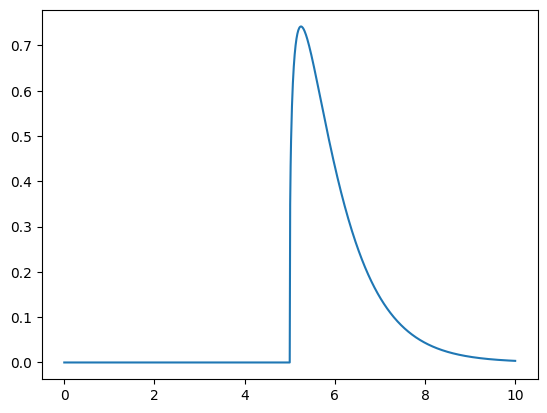

6.0
0.75


In [25]:
t = np.linspace(0,10,1001)
plt.figure()
plt.plot(t,gamma.pdf(t, a=4/3, scale=30/40, loc=5))
plt.show()

dt = np.diff(t)[0]

print(gamma.mean(a=4/3, scale=30/40, loc=5))
print(gamma.var(a=4/3, scale=30/40, loc=5))

# part 3
## Question 13

In [26]:
prob = binom.pmf(k=0,n=6,p=1/2) + binom.pmf(k=1,n=6,p=1/2) + binom.pmf(k=2,n=6,p=1/2) # page 252
print(prob)

prob = binom.pmf(k=4,n=6,p=1/2) + binom.pmf(k=5,n=6,p=1/2) + binom.pmf(k=6,n=6,p=1/2)
print(prob)

0.3437500000000002
0.34375000000000006


## Question 14

In [3]:
mean_township = 1/2
mean_stable = 3
mean_unstable = 1/4
E = mean_township + 1/4*mean_stable + 3/4*mean_unstable
print(E)
print(24/E)

1.4375
16.695652173913043


## Question 15

In [4]:
# Using convergence towrads normal page 368
from scipy.stats import norm
import numpy as np
var_township = 1/8
var_stable = 9
var_unstable = 1/8
V = var_township + (1/4)**2 *var_stable + (3/4)**2 *var_unstable
print(V)
t = 12*3
print(norm.cdf(24,scale = np.sqrt(t * V / E**3), loc = t/E))
print(t)

x = (24-t/E) / np.sqrt(t * V / E**3)
print(norm.cdf(x))
print(1-norm.cdf(x))

0.7578125
0.3653025830171502
36
0.3653025830171502
0.6346974169828499


## Question 16

In [29]:
# mean of the limiting distribution of the excess life time page 368
print(E)
print(V)
print((V**2 + E**2) / (2*E))

1.4375
0.7578125
0.9184994904891305


## Question 17
Just text question

# Question 18

In [30]:
H = [1/40,1/6,1/3]

A = H[0] + 3/4 * (1/4 * (H[1]+ 2/3*H[2]) + 3/4 * H[2]) 
B = 1.4375
print(A)
print(A / (A+B))
print()
A = 3/4 * (1/4 * (2/3*H[2]) + 3/4 * H[2]) 
B = 1.4375
print(A)
print(A / (A+B))

0.28541666666666665
0.1656590084643289

0.22916666666666669
0.1375


# part 4
## Question 21

In [36]:
sigma = np.sqrt(2*np.sqrt(20))
print(2*(1 - norm.cdf(10,loc=0, scale=sigma)))
print(1-2*(1 - norm.cdf(10,loc=0, scale=sigma)))

2.990697562442441
0.0008266862715096135
0.9991733137284904


## Question 23

In [54]:
scale = np.sqrt(2)/4
hospital = (10-6)*scale
healthy =(0-6)*scale

sigma = lambda t: np.sqrt(t*(1-t))
t1 = 1/2
t2 = 3/4


print(norm.cdf(healthy,loc=0, scale=sigma(t1)))
print(norm.cdf(-6*np.sqrt(2)/2))
print(norm.cdf(healthy,loc=0, scale=sigma(t2)))
print(norm.cdf(-6*np.sqrt(2)/ (4*np.sqrt(3/16)) ))

(4*np.sqrt(3/16))

1.104524849929268e-05
1.104524849929268e-05
4.816785043215446e-07
4.816785043215446e-07


1.7320508075688772

## Question 24

In [69]:
mu = -2
sigma = 2
a = 0
b = 10
#Theorem 8.1
u = lambda x: ( np.exp(-2*mu*x /sigma**2) - np.exp(-2*mu*a /sigma**2) )/ (np.exp(-2*mu*b /sigma**2) - np.exp(-2*mu*a /sigma**2))
#Theorem 8.2
E_t =lambda x: 1/mu * (u(x)*(b-a)-(x-a))
print('P(reahcing b)',u(6))
print((np.exp(6)-1)/(np.exp(10)-1))
print('E(T)',E_t(6))
print((-(1/2)*((np.exp(6)-1)/(np.exp(10)-1)*10 - 6)))

P(reahcing b) 0.018271068464196655
0.018271068464196655
E(T) 2.908644657679017
2.908644657679017


## Question 25

In [71]:
print(10*np.exp(np.log(2)/2*7))

113.1370849898476


## Question 26

In [94]:
beta = -np.log(3/4)
z = norm.ppf(1-0.126) 
t = 1
x = 20
# Compute sigma
numerator = np.sqrt(2 * beta) * (x - 20 * np.exp(-beta * t))
denominator = z * np.sqrt(1 - np.exp(-2 * beta * t))
sigma = numerator / denominator
print(sigma)

5.0055909916710215


In [97]:
numerator = lambda t,x: np.sqrt(2 * beta) * (x - 20 * np.exp(-beta * t))
denominator = lambda t: sigma * np.sqrt(1 - np.exp(-2 * beta * t))

prob = norm.cdf(numerator(3,0)/denominator(3))-norm.cdf(numerator(3,-20)/denominator(3))

print(prob)

0.07923570781062511
